# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech (Jaya Jaya Institute)

- Nama : Sevyra Nanda Octavianti
- Email : sevyra02@gmail.com
- Id Dicoding : sevyrananda
- Id Cohort : A312XBF453

## Persiapan Data

### Import Library

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from joblib import dump

In [7]:
# ambil dataset yang sudah tersedia dari github dicoding
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"
data = pd.read_csv(url, delimiter=';')

data.head()  # Menampilkan 5 baris pertama

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [8]:
# Total siswa
total_siswa = len(data)
print(f"Total Siswa : {total_siswa}")

Total Siswa : 4424


In [9]:
# Mengetahui Jumlah siswa berdasarkan status dropout atau graduate
status_counts = data['Status'].value_counts()
print(status_counts)

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [10]:
# Ambil jumlah dropout dan total
dropout_count = status_counts.get('Dropout', 0)
total_students = status_counts.sum()

# Hitung dropout rate
dropout_rate = (dropout_count / total_students) * 100

print(f"Dropout rate: {dropout_rate:.2f}%")

Dropout rate: 32.12%


C:\Users\Dell\AppData\Local\Temp\ipykernel_17468\3618076754.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Status', palette=colors, order=status_order)


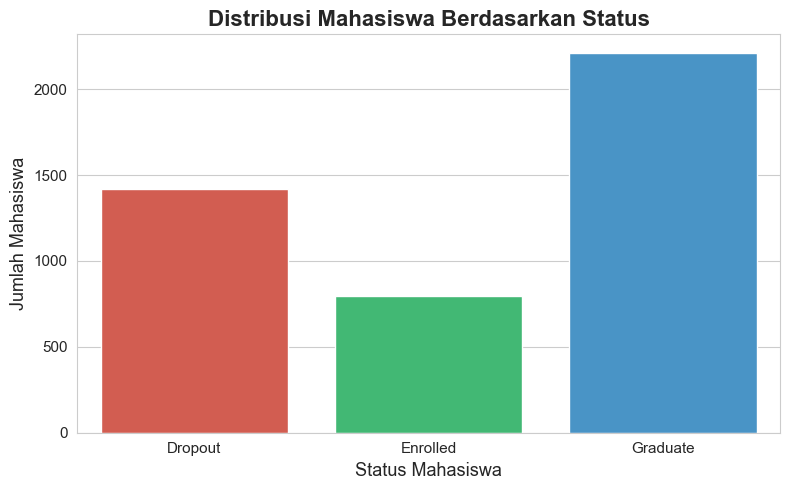

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Atur style seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))

# Warna: Dropout = merah, Graduate = hijau, Enrolled = biru
colors = ['#e74c3c', '#2ecc71', '#3498db']

# Urutan status agar tidak random
status_order = ['Dropout', 'Enrolled', 'Graduate']

sns.countplot(data=data, x='Status', palette=colors, order=status_order)

plt.title("Distribusi Mahasiswa Berdasarkan Status", fontsize=16, weight='bold')
plt.xlabel("Status Mahasiswa", fontsize=13)
plt.ylabel("Jumlah Mahasiswa", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


## Data Understanding

### Pertanyaan penelitian :
1. Faktor (Atribut) mana yang paling memengaruhi status kelulusan mahasiswa di Jaya Jaya Institute?

2. Berapa persentase dropout dan kelulusan mahasiswa secara keseluruhan di institusi ini?

3. Apakah ada hubungan antara status penerimaan mahasiswa dengan kelulusan atau dropout?

4. Bagaimana pengaruh nilai saat masuk terhadap kemungkinan mahasiswa menyelesaikan pendidikannya?

5. Jurusan mana yang memiliki tingkat dropout tertinggi dan perlu perhatian khusus?

## Data Preprocessing

In [11]:
print("Jumlah dataset, shape :", data.shape)
data.info()

Jumlah dataset, shape : (4424, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification       

In [12]:
# Melihat info dataset
for i, (nama_kolom, jumlah) in enumerate(data.count().items(), 1):
    print(f"Kolom {i:2d}: {nama_kolom} → Berjumlah : {jumlah}")

Kolom  1: Marital_status → Berjumlah : 4424
Kolom  2: Application_mode → Berjumlah : 4424
Kolom  3: Application_order → Berjumlah : 4424
Kolom  4: Course → Berjumlah : 4424
Kolom  5: Daytime_evening_attendance → Berjumlah : 4424
Kolom  6: Previous_qualification → Berjumlah : 4424
Kolom  7: Previous_qualification_grade → Berjumlah : 4424
Kolom  8: Nacionality → Berjumlah : 4424
Kolom  9: Mothers_qualification → Berjumlah : 4424
Kolom 10: Fathers_qualification → Berjumlah : 4424
Kolom 11: Mothers_occupation → Berjumlah : 4424
Kolom 12: Fathers_occupation → Berjumlah : 4424
Kolom 13: Admission_grade → Berjumlah : 4424
Kolom 14: Displaced → Berjumlah : 4424
Kolom 15: Educational_special_needs → Berjumlah : 4424
Kolom 16: Debtor → Berjumlah : 4424
Kolom 17: Tuition_fees_up_to_date → Berjumlah : 4424
Kolom 18: Gender → Berjumlah : 4424
Kolom 19: Scholarship_holder → Berjumlah : 4424
Kolom 20: Age_at_enrollment → Berjumlah : 4424
Kolom 21: International → Berjumlah : 4424
Kolom 22: Curricular

In [13]:
# Cek missing value
data.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [14]:
# Cek duplikasi data
data.duplicated().sum()
print(f'Jumlah data duplikat : {data.duplicated().sum()}')

Jumlah data duplikat : 0


# Ringkasan Dataset Mahasiswa

- **Jumlah data:** 4424 baris  
- **Jumlah fitur:** 37 kolom

## Tipe Data
- 29 kolom bertipe `int64` (data numerik diskrit)
- 7 kolom bertipe `float64` (data numerik kontinu)
- 1 kolom bertipe `object` (Status mahasiswa)

## Informasi Fitur Penting
- Data mencakup informasi demografis mahasiswa seperti status pernikahan, kewarganegaraan, usia saat pendaftaran, dan jenis kelamin.
- Fitur akademik meliputi:
  - Nilai dan status kelulusan pada semester 1 dan 2 (`Curricular_units_1st_sem_grade`, `Curricular_units_2nd_sem_grade`, dsb.)
  - Jumlah SKS yang diambil, lulus, dan tanpa evaluasi di tiap semester
  - Nilai penerimaan awal (`Admission_grade`)
- Indikator sosial ekonomi seperti status pengangguran, inflasi, dan GDP tersedia sebagai fitur eksternal.

## Kualitas Data
- Tidak terdapat nilai yang hilang (missing values) di seluruh fitur.
- Tidak ditemukan duplikasi data.

## Variabel Target
- Kolom `Status` berisi status akhir mahasiswa, bertipe objek, kemungkinan kategori seperti Dropout, Enrolled, dan Graduated.

---

### Insight Awal
- Dataset sudah bersih dan siap untuk analisis statistik atau modeling.
- Variabel `Status` bisa digunakan sebagai target klasifikasi untuk menganalisis faktor-faktor yang mempengaruhi keberhasilan studi.
- Nilai rata-rata pada semester 1 dan 2 dapat dianalisis untuk melihat tren akademik per kelompok/status.
- Fitur sosial ekonomi dan demografis memungkinkan eksplorasi hubungan antara kondisi eksternal dengan performa akademik dan keberlangsungan studi mahasiswa.

---


In [ ]:
# Melakukan label encoder pada kolom status
label_encoder = LabelEncoder()

data['Status'] = label_encoder.fit_transform(data['Status'])

data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [ ]:
# Memilih fitur yang relevan
NewData = [
    'Course', 
    'Daytime_evening_attendance', 
    'Admission_grade', 
    'Educational_special_needs', 
    'Debtor', 
    'Tuition_fees_up_to_date', 
    'Gender', 
    'Scholarship_holder', 
    'Age_at_enrollment', 
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_grade',
    'Status'
]

NewData = data[NewData]

In [19]:
NewData['Status_New'] = NewData['Status'].replace({2: 1})

C:\Users\Dell\AppData\Local\Temp\ipykernel_17468\2825438928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewData['Status_New'] = NewData['Status'].replace({2: 1})


In [21]:
NewDataEncoded = pd.get_dummies(NewData, columns=['Status'], prefix='Status')
NewDataEncoded = pd.concat([NewDataEncoded,NewData['Status']], axis=1)

NewDataEncoded.head()

,Course,Daytime_evening_attendance,Admission_grade,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Status_New,Status_0,Status_1,Status_2,Status
0,171,1,127.3,0,0,1,1,0,20,0.000000,0.000000,0,True,False,False,0
1,9254,1,142.5,0,0,0,1,0,19,14.000000,13.666667,1,False,False,True,2
2,9070,1,124.8,0,0,0,1,0,19,0.000000,0.000000,0,True,False,False,0
3,9773,1,119.6,0,0,1,0,0,20,13.428571,12.400000,1,False,False,True,2
4,8014,0,141.5,0,0,1,0,0,45,12.333333,13.000000,1,False,False,True,2


In [22]:
NewDataEncoded.corr()

,Course,Daytime_evening_attendance,Admission_grade,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Status_New,Status_0,Status_1,Status_2,Status
Course,1.000000,-0.043151,-0.125058,-0.018795,-0.032673,0.018381,-0.099571,0.017138,0.042994,0.389349,0.348728,0.033676,-0.033676,0.002758,0.029333,0.034219
Daytime_evening_attendance,-0.043151,1.000000,0.007970,0.031017,0.006658,0.038799,-0.012326,0.093912,-0.462280,0.063974,0.050493,0.080499,-0.080499,0.022073,0.058235,0.075107
Admission_grade,-0.125058,0.007970,1.000000,-0.018306,-0.014423,0.054132,0.008315,0.018881,-0.029915,0.073868,0.074402,0.095806,-0.095806,-0.046634,0.125263,0.120889
Educational_special_needs,-0.018795,0.031017,-0.018306,1.000000,0.001343,0.013630,-0.017461,0.021223,-0.036987,-0.012284,-0.012761,-0.002806,0.002806,0.010190,-0.010441,-0.007353
Debtor,-0.032673,0.006658,-0.014423,0.001343,1.000000,-0.408454,0.053812,-0.067489,0.098793,-0.104170,-0.139424,-0.229407,0.229407,-0.000513,-0.213845,-0.240999
Tuition_fees_up_to_date,0.018381,0.038799,0.054132,0.013630,-0.408454,1.000000,-0.104098,0.137421,-0.178099,0.250394,0.296480,0.429149,-0.429149,0.095864,0.327197,0.409827
Gender,-0.099571,-0.012326,0.008315,-0.017461,0.053812,-0.104098,1.000000,-0.169302,0.148835,-0.189448,-0.199133,-0.203983,0.203983,0.034214,-0.216754,-0.229270
Scholarship_holder,0.017138,0.093912,0.018881,0.021223,-0.067489,0.137421,-0.169302,1.000000,-0.189917,0.168324,0.181227,0.245354,-0.245354,-0.091666,0.299484,0.297595
Age_at_enrollment,0.042994,-0.462280,-0.029915,-0.036987,0.098793,-0.178099,0.148835,-0.189917,1.000000,-0.156616,-0.173419,-0.254215,0.254215,-0.055241,-0.195009,-0.243438
Curricular_units_1st_sem_grade,0.389349,0.063974,0.073868,-0.012284,-0.104170,0.250394,-0.189448,0.168324,-0.156616,1.000000,0.837170,0.480669,-0.480669,0.046781,0.412982,0.485207


In [23]:
NewDataEncoded.describe()

,Course,Daytime_evening_attendance,Admission_grade,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Status_New,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,8856.642631,0.890823,126.978119,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,10.640822,10.230206,0.678797,1.178119
std,2063.566416,0.311897,14.482001,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,4.843663,5.210808,0.466991,0.888243
min,33.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000
25%,9085.000000,1.000000,117.900000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,11.000000,10.750000,0.000000,0.000000
50%,9238.000000,1.000000,126.100000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,12.285714,12.200000,1.000000,1.000000
75%,9556.000000,1.000000,134.800000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,13.400000,13.333333,1.000000,2.000000
max,9991.000000,1.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,18.875000,18.571429,1.000000,2.000000


In [24]:
filter_do = NewData.loc[NewData['Status']==0]
filter_enrolled = NewData.loc[NewData['Status']==1]
filter_graduated = NewData.loc[NewData['Status']==2]
filter_notdo = NewData.loc[NewData['Status']>0]

In [25]:
filter_notdo.head()

,Course,Daytime_evening_attendance,Admission_grade,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Status,Status_New
1,9254,1,142.5,0,0,0,1,0,19,14.000000,13.666667,2,1
3,9773,1,119.6,0,0,1,0,0,20,13.428571,12.400000,2,1
4,8014,0,141.5,0,0,1,0,0,45,12.333333,13.000000,2,1
5,9991,0,114.8,0,1,1,1,0,50,11.857143,11.500000,2,1
6,9500,1,128.4,0,0,1,0,1,18,13.300000,14.345000,2,1


In [26]:
print("Jumlah siswa yang dropout:", len(filter_do))
print("Jumlah siswa yang terdaftar:", len(filter_enrolled))
print("Jumlah siswa yang lulus:", len(filter_graduated))
print("Persentase Dropout rate:", str(round((len(filter_do)/len(NewData)*100),2))+"%")
print("Persentase Graduation rate:", str(round((len(filter_graduated)/len(NewData)*100),2))+"%")

Jumlah siswa yang dropout: 1421
Jumlah siswa yang terdaftar: 794
Jumlah siswa yang lulus: 2209
Persentase Dropout rate: 32.12%
Persentase Graduation rate: 49.93%


In [27]:
# Mengetahui jumlah penerima beasiswa
sum_column1 = NewData['Scholarship_holder'].sum()

print("Jumlah penerima beasiswa:", sum_column1)

Jumlah penerima beasiswa: 1099


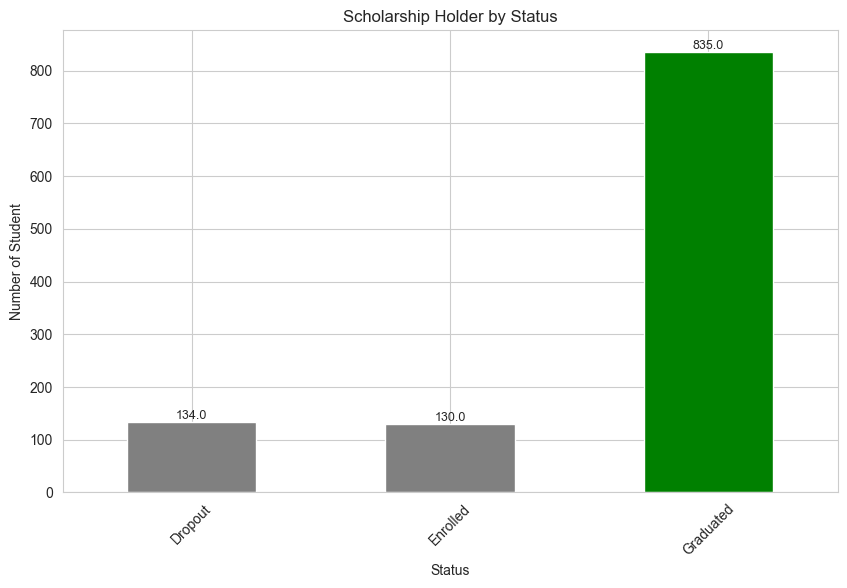

In [35]:
# Distribusi siswa yang mendapatkan beasiswa berdasarkan status
a = NewData.groupby('Status')['Scholarship_holder'].sum()

max = a.idxmax()

plt.figure(figsize=(10, 6))
colors = ['grey' if b != max else 'green' for b in a.index]
a.plot(kind='bar', color=colors)

plt.xlabel('Status')
plt.ylabel('Number of Student')
plt.title('Scholarship Holder by Status')
plt.xticks(rotation=45)

custom_labels = ['Dropout', 'Enrolled', 'Graduated']
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=45)

for index, value in enumerate(a):
    plt.text(index, value, f"{float(value):,}", ha='center', va='bottom', fontsize=9, )

plt.show()

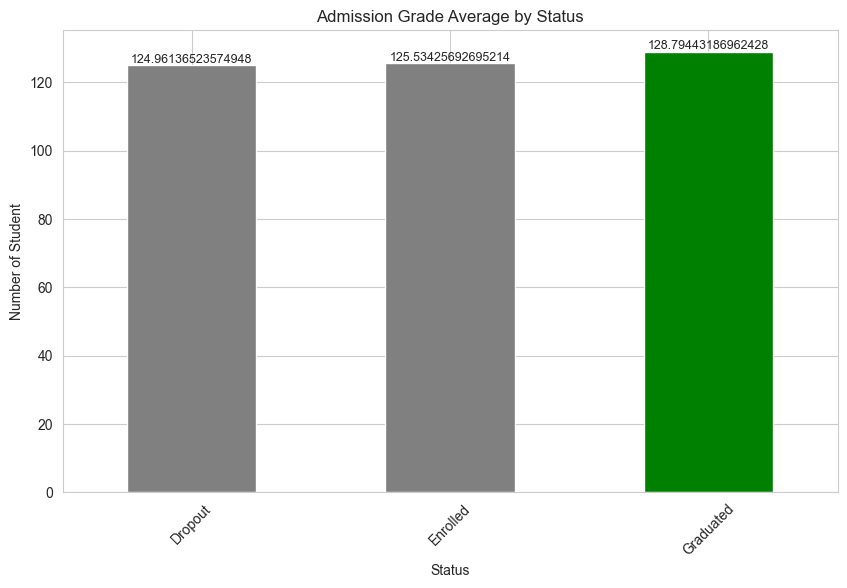

In [36]:
a = NewData.groupby('Status')['Admission_grade'].mean()

max = a.idxmax()

plt.figure(figsize=(10, 6))
colors = ['grey' if b != max else 'green' for b in a.index]
a.plot(kind='bar', color=colors)

plt.xlabel('Status')
plt.ylabel('Number of Student')
plt.title('Admission Grade Average by Status')
plt.xticks(rotation=45)

custom_labels = ['Dropout', 'Enrolled', 'Graduated']
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=45)

for index, value in enumerate(a):
    plt.text(index, value, f"{float(value):,}", ha='center', va='bottom', fontsize=9, )

plt.show()

In [37]:
data_do = NewDataEncoded[NewDataEncoded['Status_0'] == 1]
data_enrolled = NewDataEncoded[NewDataEncoded['Status_1'] == 1]
data_graduated = NewDataEncoded[NewDataEncoded['Status_2'] == 1]

course_do = data_do.groupby('Course')['Status_0'].sum()
course_enrolled = data_enrolled.groupby('Course')['Status_1'].sum()
course_graduated = data_graduated.groupby('Course')['Status_2'].sum()

total_course = round((course_do/(course_do+course_enrolled+course_graduated)*100),2)
total_course

Course
33      66.67
171     38.14
8014    33.02
9003    40.95
9070    22.57
9085    26.71
9119    54.12
9130    55.32
9147    35.26
9238    18.31
9254    38.10
9500    15.40
9556    38.37
9670    35.45
9773    30.51
9853    44.27
9991    50.75
dtype: float64

In [38]:
NewDataEncoded.to_csv("dataset_siap.csv")

dataset baru (sudah bersih) telah disimpan dalam format csv dengan nama file `dataset_siap.csv` untuk nantinya digunakan dalam kebutuhan pembuatan dashboard

In [39]:
NewDataEncoded

,Course,Daytime_evening_attendance,Admission_grade,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Status_New,Status_0,Status_1,Status_2,Status
0,171,1,127.3,0,0,1,1,0,20,0.000000,0.000000,0,True,False,False,0
1,9254,1,142.5,0,0,0,1,0,19,14.000000,13.666667,1,False,False,True,2
2,9070,1,124.8,0,0,0,1,0,19,0.000000,0.000000,0,True,False,False,0
3,9773,1,119.6,0,0,1,0,0,20,13.428571,12.400000,1,False,False,True,2
4,8014,0,141.5,0,0,1,0,0,45,12.333333,13.000000,1,False,False,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,9773,1,122.2,0,0,1,1,0,19,13.600000,12.666667,1,False,False,True,2
4420,9773,1,119.0,0,1,0,0,0,18,12.000000,11.000000,0,True,False,False,0
4421,9500,1,149.5,0,0,1,0,1,30,14.912500,13.500000,0,True,False,False,0
4422,9147,1,153.8,0,0,1,0,1,20,13.800000,12.000000,1,False,False,True,2


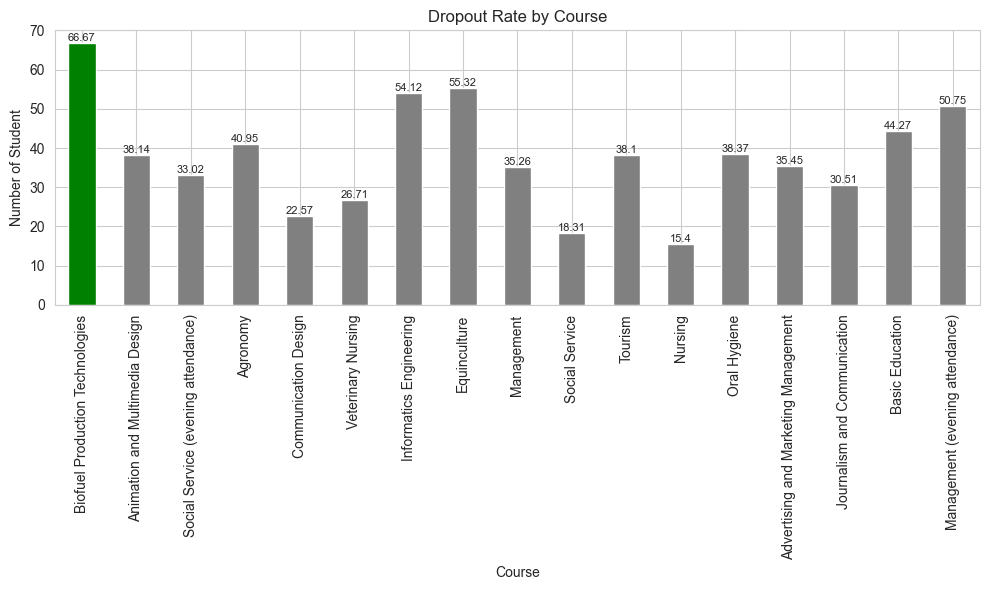

In [40]:
a = total_course

max = a.idxmax()

plt.figure(figsize=(10, 6))
colors = ['grey' if b != max else 'green' for b in a.index]
a.plot(kind='bar', color=colors)

plt.xlabel('Course')
plt.ylabel('Number of Student')
plt.title('Dropout Rate by Course')
plt.xticks(rotation=45)

custom_labels = [
    'Biofuel Production Technologies',
    'Animation and Multimedia Design',
    'Social Service (evening attendance)',
    'Agronomy',
    'Communication Design',
    'Veterinary Nursing',
    'Informatics Engineering',
    'Equinculture',
    'Management',
    'Social Service',
    'Tourism',
    'Nursing',
    'Oral Hygiene',
    'Advertising and Marketing Management',
    'Journalism and Communication',
    'Basic Education',
    'Management (evening attendance)'
]

plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=90) 
for index, value in enumerate(a):
    plt.text(index, value, f"{float(value):,}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

## Modeling

In [59]:
X = NewDataEncoded.iloc[:, :11]
y = NewDataEncoded.iloc[:, 11:12]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

model = RandomForestClassifier(n_estimators=45, random_state=12)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8587570621468926


In [60]:
dump(model, 'model.joblib')

['model.joblib']

Model berhasil disimpan dalam bentuk joblib yang nantinya akan digunakan untuk prediksi

### Evaluation

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       279
           1       0.89      0.91      0.90       606

    accuracy                           0.86       885
   macro avg       0.84      0.83      0.83       885
weighted avg       0.86      0.86      0.86       885

